# Building a Classification Model for the Iris data set

Chanin Nantasenamat

<i>Data Professor YouTube channel, http://youtube.com/dataprofessor </i>

In this Jupyter notebook, we will be building a classification model for the Iris data set using the random forest algorithm.

## 1. Import libraries

In [2]:
# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd

## 2. Load the *iris* data set

In [3]:
file_path = "D:/Data project/DATA science/Github/Machine-Learning-Repository/Mushroom dataset/mushroom metadata/agaricus-lepiota.data" # Replace with the actual file path

# Define column names based on the dataset's attributes
column_names = [
    "class",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "bruises",
    "odor",
    "gill-attachment",
    "gill-spacing",
    "gill-size",
    "gill-color",
    "stalk-shape",
    "stalk-root",
    "stalk-surface-above-ring",
    "stalk-surface-below-ring",
    "stalk-color-above-ring",
    "stalk-color-below-ring",
    "veil-type",
    "veil-color",
    "ring-number",
    "ring-type",
    "spore-print-color",
    "population",
    "habitat"
]

# Read the data file into a Pandas DataFrame
data = pd.read_csv(file_path, names=column_names)

## 3. Input features
The ***iris*** data set contains 4 input features and 1 output variable (the class label).

### 3.1. Input features

In [4]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 3.2. Output features

In [5]:
print(data['class'])

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: class, Length: 8124, dtype: object


## 4. Glimpse of the data

### 4.1. Input features

In [10]:
data.drop(columns = 'class')

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,s,o,o,p,o,o,p,b,c,l
8120,x,s,n,f,n,a,c,b,y,e,...,s,o,o,p,n,o,p,b,v,l
8121,f,s,n,f,n,a,c,b,n,e,...,s,o,o,p,o,o,p,b,c,l
8122,k,y,n,f,y,f,c,n,b,t,...,k,w,w,p,w,o,e,w,v,l


### 4.2. Output variable (the Class label)

In [41]:
data.iloc[:,0]

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

# Preprocessing

In [8]:
from sklearn.preprocessing import LabelEncoder
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [9]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

### 4.3. Assigning *input* and *output* variables
Let's assign the 4 input variables to X and the output variable (class label) to Y

In [10]:
Y = data['class']
X = data.drop('class', axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### 4.3. Let's examine the data dimension

In [13]:
X.shape

(8124, 22)

In [14]:
Y.shape

(8124,)

## 5. Build Classification Model using Random Forest

In [15]:
clf = RandomForestClassifier()

In [16]:
clf.fit(X, Y)

RandomForestClassifier()

## 6. Feature Importance

In [17]:
print(clf.feature_importances_)

[0.00308777 0.01004466 0.01448698 0.0535101  0.16341866 0.00399501
 0.03366778 0.09263829 0.11923597 0.02285096 0.06242738 0.04761255
 0.0450794  0.01713748 0.01853152 0.         0.00153034 0.0149693
 0.07074267 0.10008183 0.074404   0.03054735]


## 7. Make Prediction

In [19]:
X.iloc[8123,0:].values

array([ 1.02971224,  0.14012794, -0.19824983, -0.84322964,  0.40656203,
       -6.13886914, -0.43886364, -0.66903831,  1.74832457, -1.14480575,
       -1.0459524 ,  0.68377765,  0.58638466, -0.42928778, -0.41668059,
        0.        , -3.97905487, -0.25613174,  0.94808086,  0.16925365,
       -2.11182722,  0.28570978])

In [21]:
print(clf.predict([[ 1.02971224,  0.14012794, -0.19824983, -0.84322964,  0.40656203,
       -6.13886914, -0.43886364, -0.66903831,  1.74832457, -1.14480575,
       -1.0459524 ,  0.68377765,  0.58638466, -0.42928778, -0.41668059,
        0.        , -3.97905487, -0.25613174,  0.94808086,  0.16925365,
       -2.11182722,  0.28570978]]))

[0]


C:\Users\nayan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [23]:
print(clf.predict([[ 1.02971224,  0.14012794, -0.19824983, -0.84322964,  0.40656203,
       -6.13886914, -0.43886364, -0.66903831,  1.74832457, -1.14480575,
       -1.0459524 ,  0.68377765,  0.58638466, -0.42928778, -0.41668059,
        0.        , -3.97905487, -0.25613174,  0.94808086,  0.16925365,
       -2.11182722,  0.28570978]]))

[0]


C:\Users\nayan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [24]:
print(clf.predict_proba([[ 1.02971224,  0.14012794, -0.19824983, -0.84322964,  0.40656203,
       -6.13886914, -0.43886364, -0.66903831,  1.74832457, -1.14480575,
       -1.0459524 ,  0.68377765,  0.58638466, -0.42928778, -0.41668059,
        0.        , -3.97905487, -0.25613174,  0.94808086,  0.16925365,
       -2.11182722,  0.28570978]]))

[[1. 0.]]


C:\Users\nayan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## 8. Data split (80/20 ratio)

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [26]:
X_train.shape, Y_train.shape

((6499, 22), (6499,))

In [27]:
X_test.shape, Y_test.shape

((1625, 22), (1625,))

## 9. Rebuild the Random Forest Model

In [28]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

### 9.1. Performs prediction on single sample from the data set

In [29]:
print(clf.predict([[ 1.02971224,  0.14012794, -0.19824983, -0.84322964,  0.40656203,
       -6.13886914, -0.43886364, -0.66903831,  1.74832457, -1.14480575,
       -1.0459524 ,  0.68377765,  0.58638466, -0.42928778, -0.41668059,
        0.        , -3.97905487, -0.25613174,  0.94808086,  0.16925365,
       -2.11182722,  0.28570978]]))

[0]


C:\Users\nayan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [30]:
print(clf.predict_proba([[ 1.02971224,  0.14012794, -0.19824983, -0.84322964,  0.40656203,
       -6.13886914, -0.43886364, -0.66903831,  1.74832457, -1.14480575,
       -1.0459524 ,  0.68377765,  0.58638466, -0.42928778, -0.41668059,
        0.        , -3.97905487, -0.25613174,  0.94808086,  0.16925365,
       -2.11182722,  0.28570978]]))

[[1. 0.]]


C:\Users\nayan\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### 9.2. Performs prediction on the test set

#### *Predicted class labels*

In [31]:
print(clf.predict(X_test))

[0 1 1 ... 1 0 1]


#### *Actual class labels*

In [32]:
print(Y_test)

5661    0
6347    1
6944    1
2447    0
3275    0
       ..
1404    0
7915    0
7719    1
1860    0
5636    1
Name: class, Length: 1625, dtype: int32


## 10. Model Performance

In [38]:
print(clf.score(X_test, Y_test))

1.0


# Visualization

<AxesSubplot: >

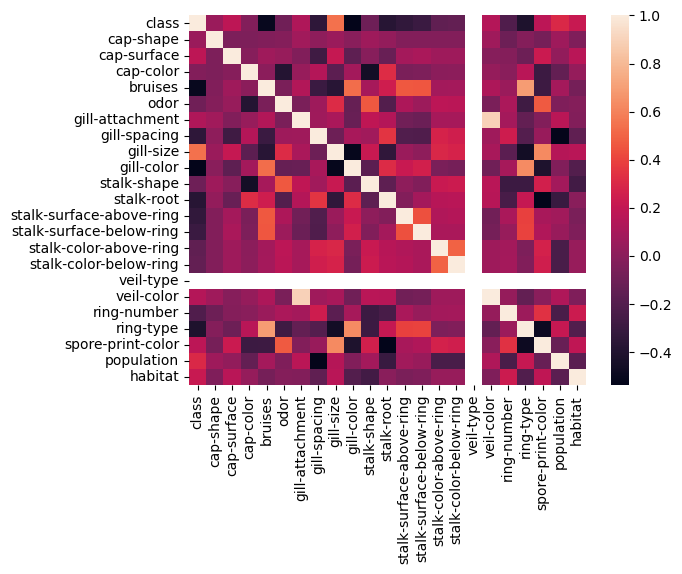

In [60]:
import seaborn as sns
corr1 = data.corr()
corr2 = pd.concat([X, Y], axis=1).corr()

sns.heatmap(corr1)


<AxesSubplot: >

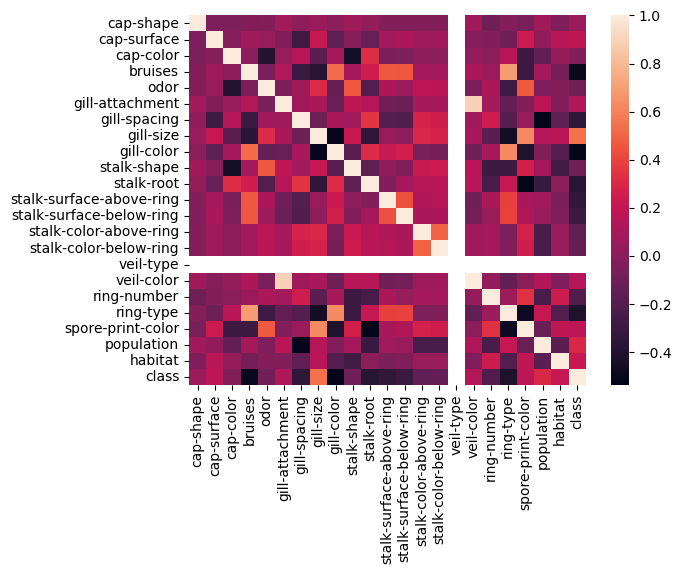

In [61]:
sns.heatmap(corr2)